In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = [6.4, 4.8]
from datetime import datetime

In [4]:
data = pd.read_csv(r"C:/Users/piyus/Desktop/Review 2/book12345.csv")
data.shape
# parsing string to a date time type
data['months']=pd.to_datetime(data['months'], infer_datetime_format=True)
data=data.set_index(['months'])
print(data)

            total gallons
months                   
2012-01-01     1045208300
2012-01-02      939876900
2012-01-03     1222826500
2012-01-04     1349147000
2012-01-05     1130823000
...                   ...
2018-01-05     1476807300
2018-01-06     1236809300
2018-01-07     1262114200
2018-01-08     1363306600
2018-01-09     1318655800

[81 rows x 1 columns]


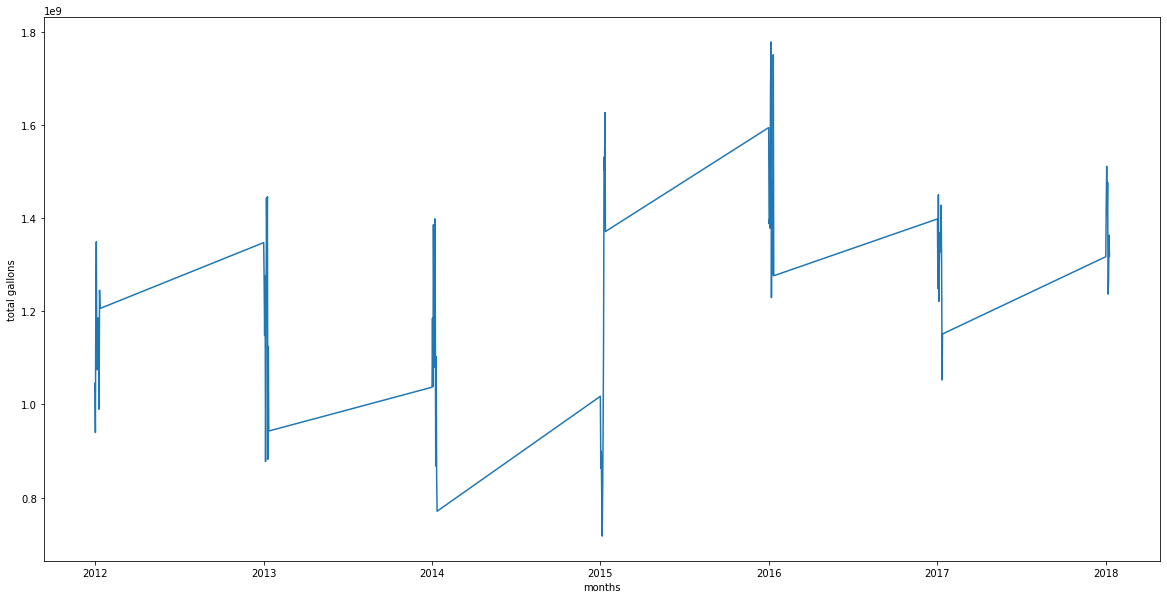

In [5]:
# Plotting Graph
plt.figure(figsize=(20,10))
plt.xlabel("months")
plt.ylabel("total gallons")
plt.plot(data)

In [6]:
# Determining Rolling Statistics
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean)
print(rolstd)

            total gallons
months                   
2012-01-01            NaN
2012-01-02            NaN
2012-01-03            NaN
2012-01-04            NaN
2012-01-05            NaN
...                   ...
2018-01-05   1.344064e+09
2018-01-06   1.334045e+09
2018-01-07   1.325118e+09
2018-01-08   1.328084e+09
2018-01-09   1.318998e+09

[81 rows x 1 columns]
            total gallons
months                   
2012-01-01            NaN
2012-01-02            NaN
2012-01-03            NaN
2012-01-04            NaN
2012-01-05            NaN
...                   ...
2018-01-05   1.311082e+08
2018-01-06   1.345747e+08
2018-01-07   1.355770e+08
2018-01-08   1.360275e+08
2018-01-09   1.323617e+08

[81 rows x 1 columns]


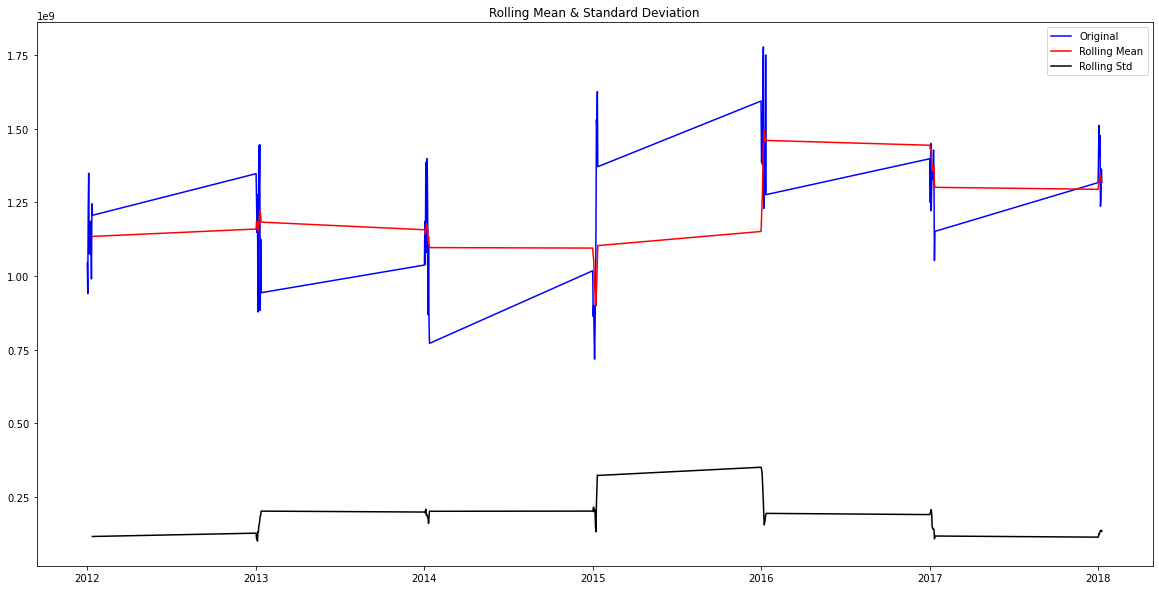

In [7]:
# plotting rolling stastics
plt.figure(figsize=(20,10))
original=plt.plot(data, color='blue', label='Original')
mean_6=plt.plot(rolmean, color='red', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [8]:
# Performing Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Results For Dickey-Fuller Test: ')
dftest=adfuller(data['total gallons'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results For Dickey-Fuller Test: 
Test Statistic          -3.178475
p-value                  0.021265
Lags Used                1.000000
No. of Obs              79.000000
Critical Value (1%)     -3.515977
Critical Value (5%)     -2.898886
Critical Value (10%)    -2.586694
dtype: float64


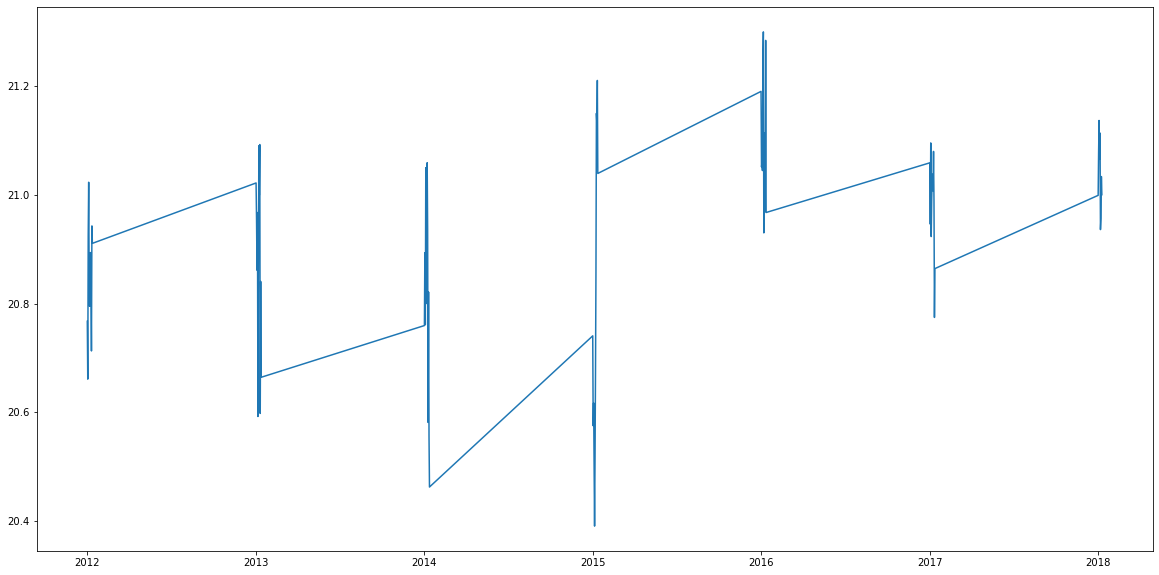

In [9]:
# Estimating Trends
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

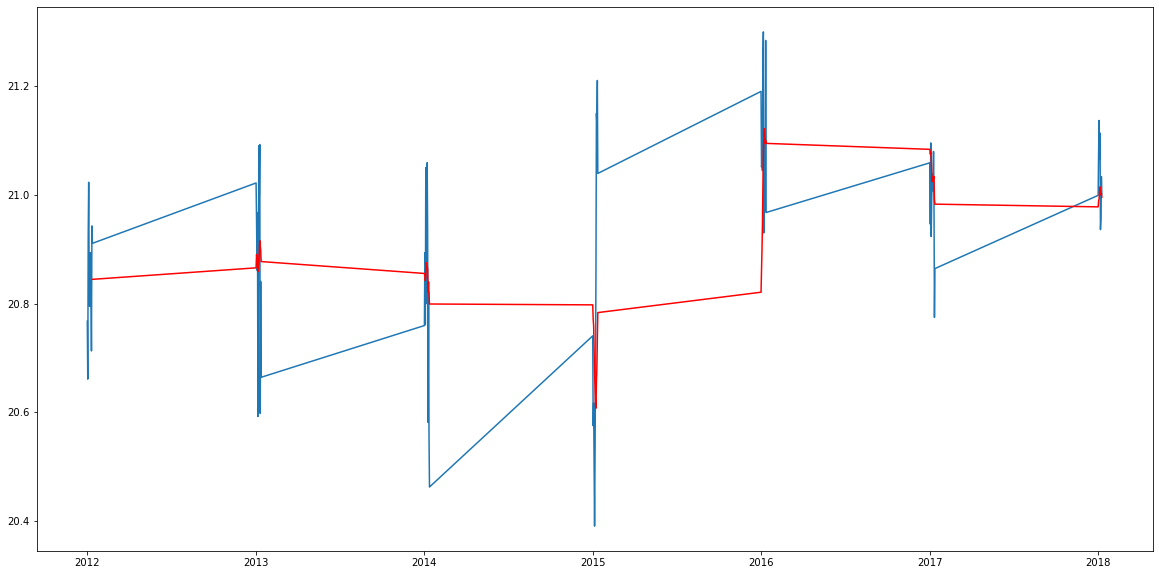

In [10]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='red')

In [11]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,total gallons
months,
2012-01-12,0.066079
2013-01-01,0.155811
2013-01-02,0.064302
2013-01-03,-0.023478
2013-01-04,0.086995


In [12]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='blue', label='original')
    mean_6=plt.plot(rolmean, color='red', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['total gallons'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

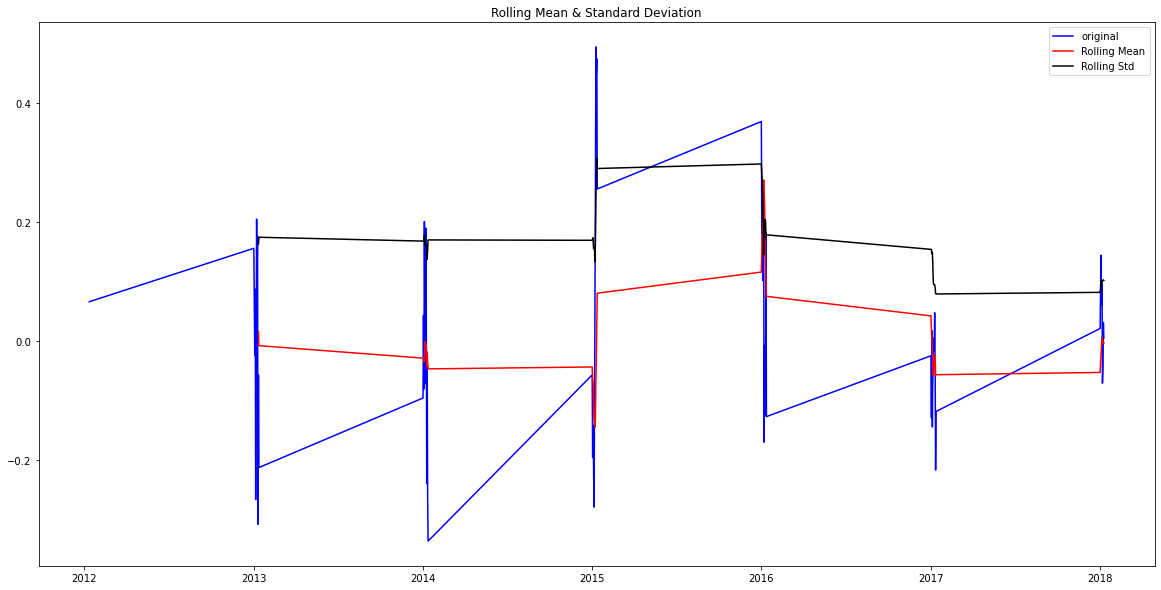

Dickey-Fuller Test: 
Test Statistic          -3.504477
p-value                  0.007873
Lags Used                3.000000
No. of Obs              66.000000
Critical Value (1%)     -3.533560
Critical Value (5%)     -2.906444
Critical Value (10%)    -2.590724
dtype: float64


In [13]:
stationarity(data_log_diff)

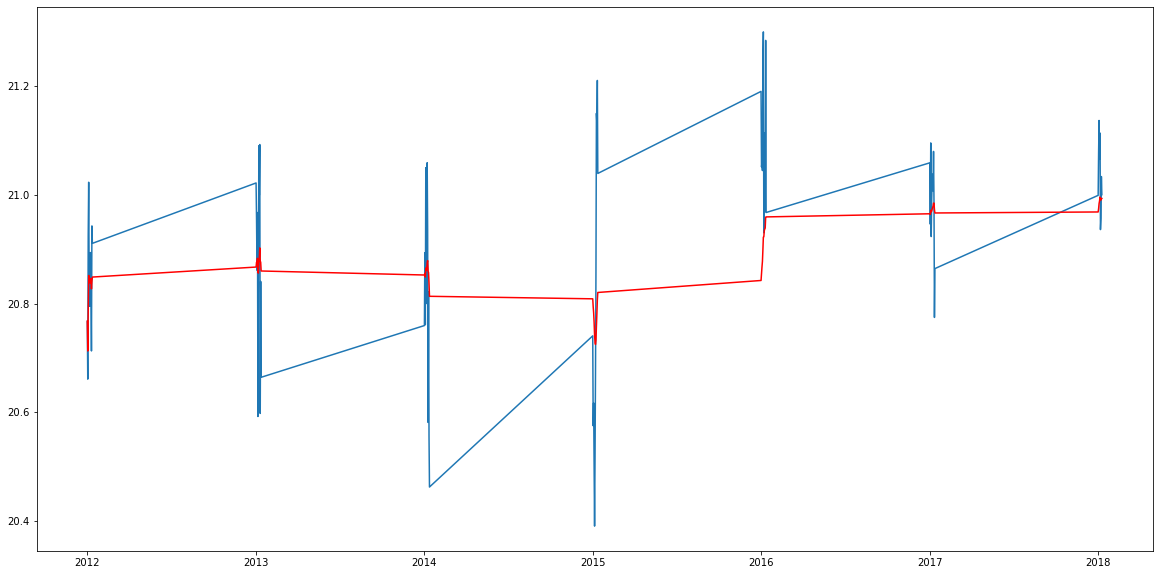

In [14]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='red')

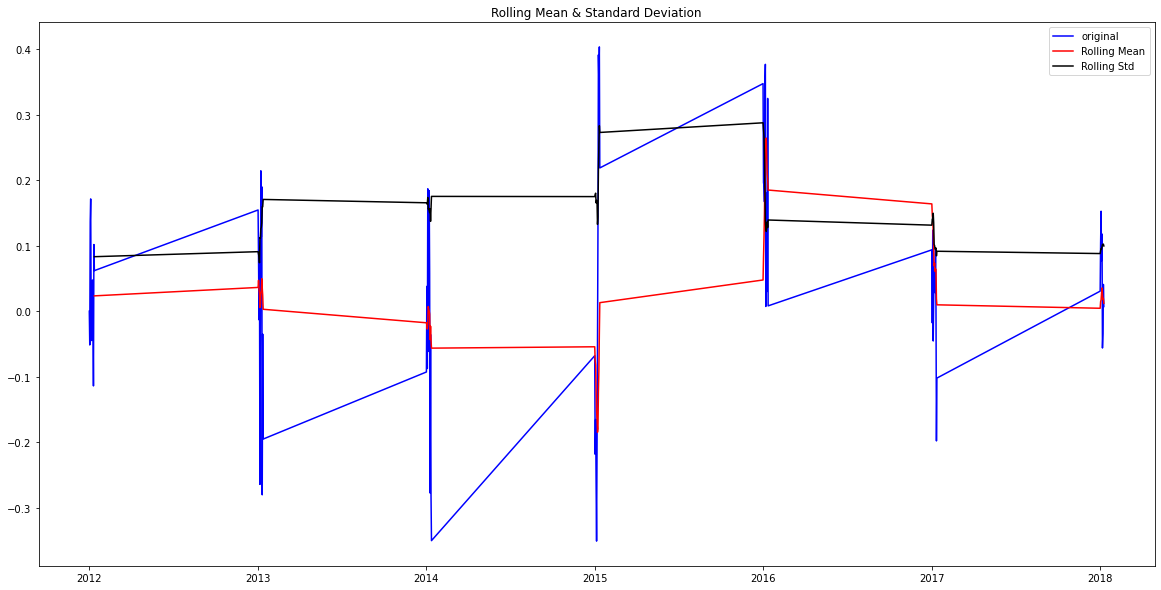

Dickey-Fuller Test: 
Test Statistic          -2.546662
p-value                  0.104530
Lags Used                4.000000
No. of Obs              76.000000
Critical Value (1%)     -3.519481
Critical Value (5%)     -2.900395
Critical Value (10%)    -2.587498
dtype: float64


In [15]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

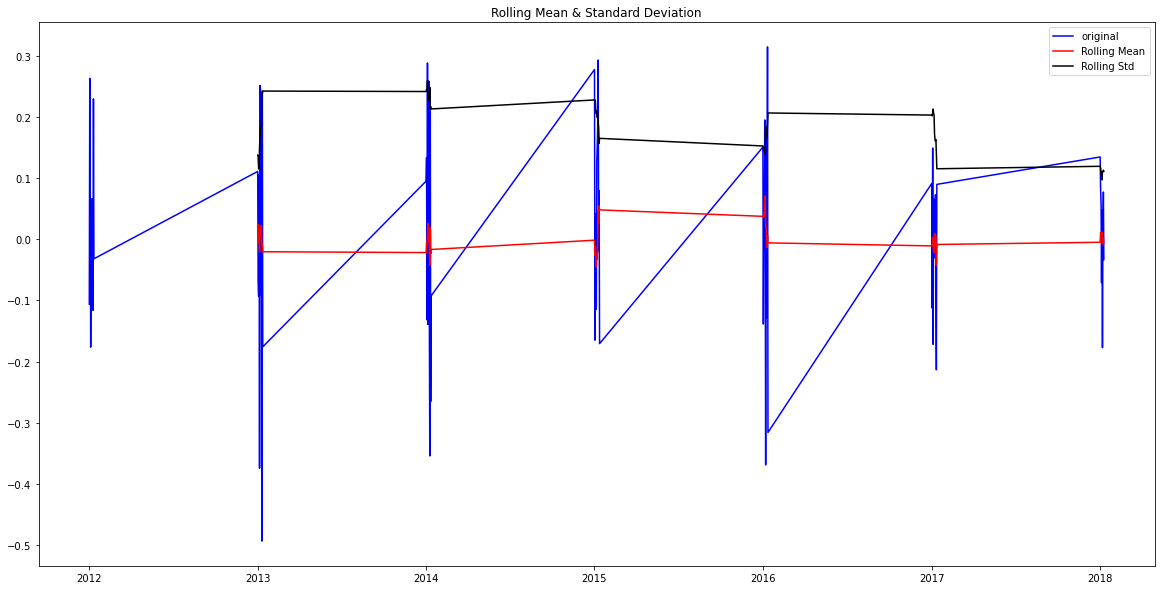

Dickey-Fuller Test: 
Test Statistic         -6.324599e+00
p-value                 3.007894e-08
Lags Used               3.000000e+00
No. of Obs              7.600000e+01
Critical Value (1%)    -3.519481e+00
Critical Value (5%)    -2.900395e+00
Critical Value (10%)   -2.587498e+00
dtype: float64


In [16]:
data_shift=data_log-data_log.shift()

data_shift=data_shift.dropna()
stationarity(data_shift)

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [18]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

NameError: name 'residual' is not defined

C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Partial Autocorrelation Function')

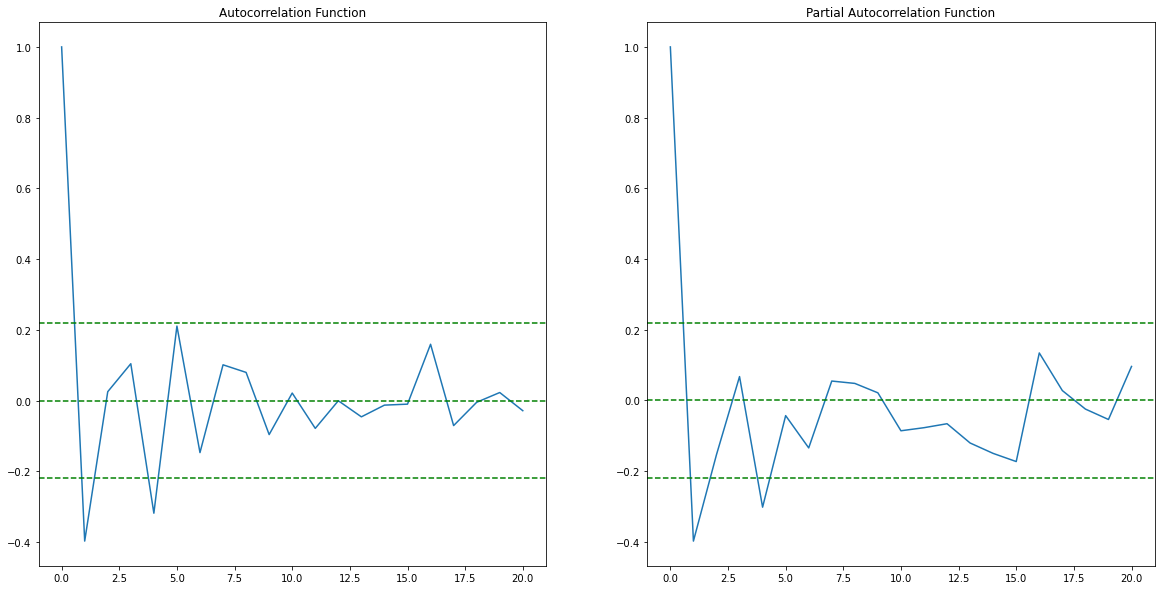

In [19]:
# ARIMA Model
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

plotting ARIMA model


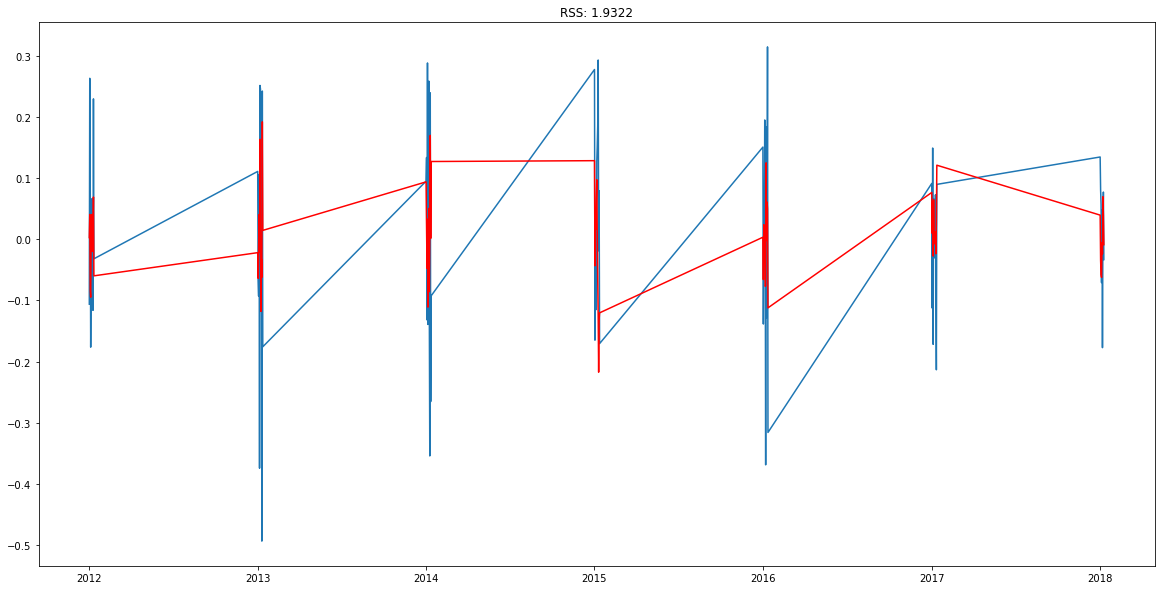

In [20]:
# Arima Model
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(1,1,1))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['total gallons'])**2))
print('plotting ARIMA model')

In [21]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

months
2012-01-02    0.002703
2012-01-03    0.040456
2012-01-04   -0.083662
2012-01-05   -0.094785
2012-01-06    0.022033
dtype: float64


In [22]:
# convert to cumulative sum
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

months
2012-01-02    0.002703
2012-01-03    0.043159
2012-01-04   -0.040503
2012-01-05   -0.135288
2012-01-06   -0.113255
dtype: float64


In [23]:
predictions_log=pd.Series(data_log['total gallons'], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

months
2012-01-01    20.767482
2012-01-02    20.663962
2012-01-03    20.967590
2012-01-04    20.982235
2012-01-05    20.710924
dtype: float64

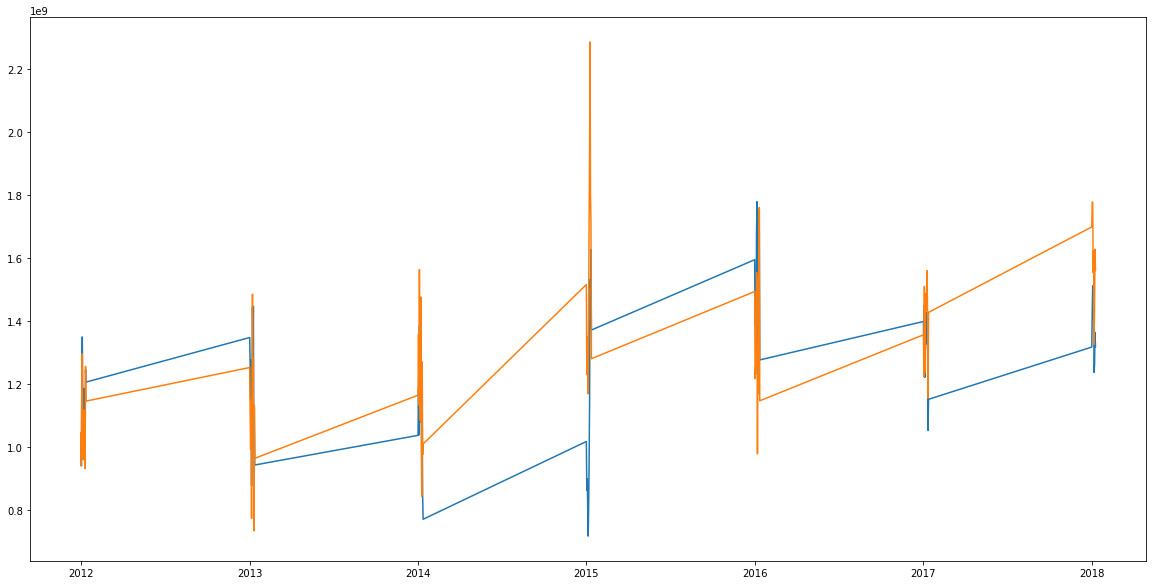

In [24]:

predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


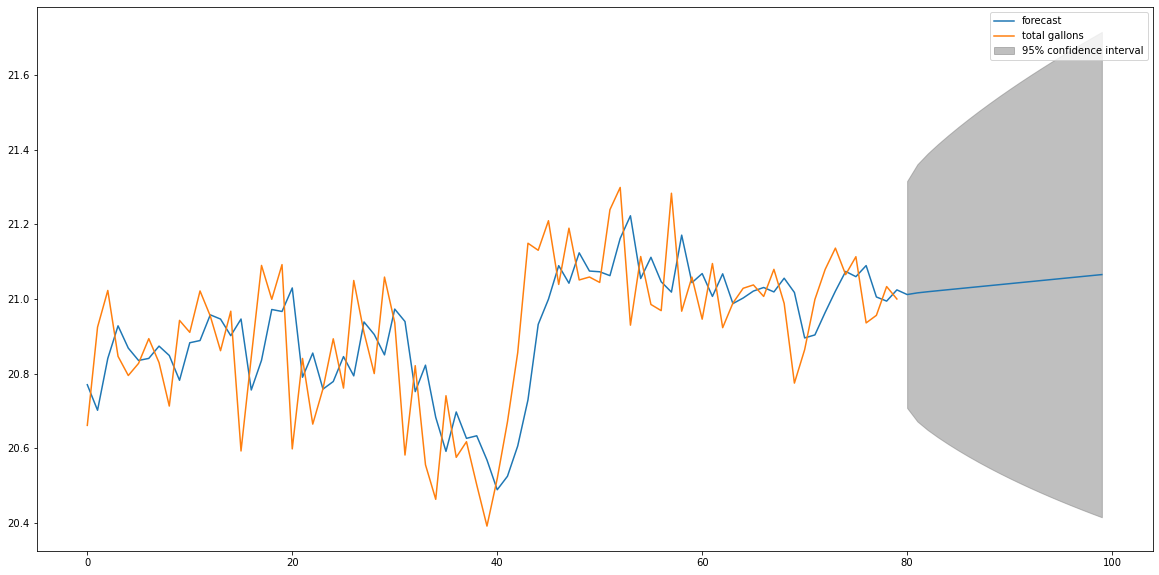

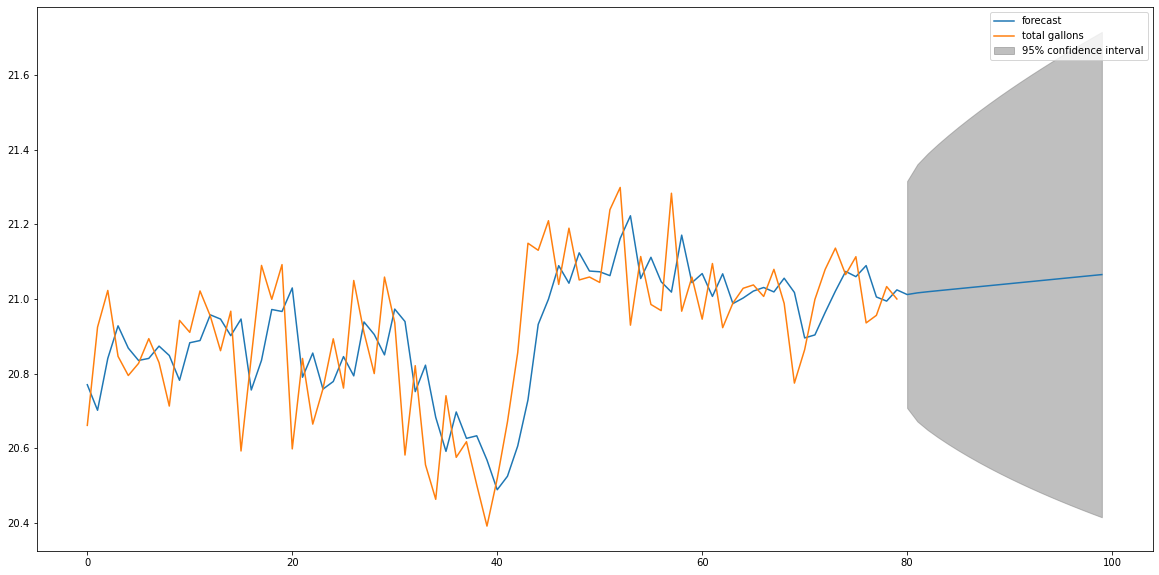

In [25]:

rcParams['figure.figsize']=20,10
results.plot_predict(1,100)

In [26]:
results.forecast(steps=24)

(array([21.01181789, 21.01624164, 21.01926495, 21.0220273 , 21.02474102,
        21.02744568, 21.03014866, 21.03285131, 21.03555391, 21.0382565 ,
        21.04095909, 21.04366167, 21.04636426, 21.04906685, 21.05176943,
        21.05447202, 21.0571746 , 21.05987719, 21.06257978, 21.06528236,
        21.06798495, 21.07068754, 21.07339012, 21.07609271]),
 array([0.15513332, 0.17579158, 0.18891466, 0.20033238, 0.210986  ,
        0.2211008 , 0.23076803, 0.24004541, 0.2489772 , 0.25759945,
        0.26594229, 0.27403126, 0.2818882 , 0.28953201, 0.29697914,
        0.30424404, 0.31133947, 0.31827675, 0.32506602, 0.33171636,
        0.33823597, 0.34463226, 0.35091199, 0.3570813 ]),
 array([[20.70776216, 21.31587362],
        [20.67169648, 21.3607868 ],
        [20.64899902, 21.38953087],
        [20.62938306, 21.41467154],
        [20.61121607, 21.43826597],
        [20.59409609, 21.46079528],
        [20.57785164, 21.48244567],
        [20.56237095, 21.50333168],
        [20.54756757, 21.523